In [215]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
from bs4 import BeautifulSoup
import re
####한국어 형태소 분석기####
from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
mecab = Mecab()
import unicodedata

In [33]:
os.getcwd()

'/Users/sera/company/ReportCrawling'

In [34]:
data = pd.read_csv('reportdata.csv')
data.content = list(map(lambda x : ''.join(eval(x)), data.content))

# All text cleansing

### 기본 html tag, \n 제거

In [35]:
data.content = data.content.replace('<.*?>|{\s?.*\s?}|\n'," ",regex=True)

###  "font~" ,"#f숫자" 제거

In [36]:
data.content = data.content.replace("#f[\d]+|@font[\D]+","",regex=True)

### 2칸 이상의 공백 제거

In [37]:
data.content = data.content.replace("\s+"," ",regex=True)

### 돈 단위 (억원, 만원..) 삭제

확률은 적지만 full 이라는 의미의 "만원"이 삭제될 우려가 있어서 정규표현식사용

In [38]:
data.content = data.content.replace('[\w]+\s?만원|[\w]+\s?억원|[\w]+\s?조원',"",regex=True)

### 숫자제거

In [39]:
data.content = data.content.replace('\d+',' ',regex=True)
data.content = data.content.replace("\s+"," ",regex=True)

### 이메일제거

In [40]:
data.content = data.content.replace('[\w\-\.]+\@[\w\-\.]+', " ",regex=True)

### 특수문자 제거

In [41]:
data.content = data.content.replace("[\(\)-=+,#/\/\?:^%$@*※~&ㆍ!』\\|\[\]\<\>…》│〓'［【】\[\]▽▼△▲▲■◇♦◆○●ⓒΔ▷▶�━ㆍ㈜]", " ",regex=True)

### Compliance notice 이후 부분 모두 삭제

In [42]:
data.content = data.content.replace('(?=(Compliance notice)).+',"",regex=True)
data.content = data.content.replace("\s+"," ",regex=True)

### txt 기업 C omment, txt 실적 Review, txt 기업 Note, txt 기업 Brief

In [43]:
data.content = data.content.replace(' txt 기업 C omment','',regex=True)
data.content = data.content.replace(' txt 실적 Review','',regex=True)
data.content = data.content.replace(' txt 기업 Note','',regex=True)
data.content = data.content.replace(' txt 기업 Brief','',regex=True)

### 투자의견 및 목표주가 ~ 이후 삭제

In [44]:
data.content = data.content.replace('(?<=)(투자의견 및 목표주가).+','',regex=True)

### 불용어사전

In [53]:
stopwords = ['YoY', 'QoQ','개월','page','목표주가','매출액','영업이익','순이익',
             'EPS', '증감률', 'EBITDA', 'PER', 'EV', 'EBITDA', 'PBR', 'ROE', 'DY','지배주주지분',
            '최고','최저가','주가상승률','하 회 부 합','시가총액','발행주식수','일평균거래대금',
            '유동주식비율','외국인지분율','주요주주','FnGuide',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Nov','Dec',
            'page','txt','절대주가']

In [55]:
#mecab사용 + noun 만 + 단어길이 2이상만 추출
def remove_stopwords(content):
    nouns = mecab.nouns(content)
    #불용어제거, 단어길이 2이상
    words = []
    for w in nouns :
        if w not in stopwords and len(w)>=2:
            words.append(w)
    return words


In [56]:
clean_nouns = []
for doc in tqdm(data.content) :
    clean_nouns.append(remove_stopwords(doc))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 982/982 [00:01<00:00, 531.43it/s]


In [57]:
clean_nouns

[['텔레콤',
  '매수',
  '유지',
  '플래닛',
  '투자',
  '유치',
  '무산',
  '영향',
  '미미',
  '표주',
  '유지',
  '주가',
  '발행주',
  '식수',
  '백만',
  '최저',
  '평균',
  '거래',
  '대금',
  '유동',
  '주식',
  '비율',
  '외국인',
  '지분',
  '주요',
  '주주',
  '국민',
  '연금',
  '주가',
  '상승',
  '주가',
  '상대',
  '주가',
  '추이',
  '텔레콤',
  '주가',
  '자료',
  '센서스',
  '플래닛',
  '중국',
  '투자',
  '유치',
  '무산',
  '보도',
  '언론',
  '보도',
  '텔레콤',
  '자회사',
  '지분',
  '플래닛',
  '중국',
  '투자',
  '유치',
  '무산',
  '커머스',
  '번가',
  '시럽',
  '캐쉬',
  '업체',
  '플래닛',
  '중국',
  '민성',
  '투자',
  '공사',
  '규모',
  '투자',
  '협상',
  '진행',
  '플래닛',
  '공식',
  '협상',
  '중단',
  '통보',
  '확인',
  '플래닛',
  '정치',
  '이슈',
  '가격',
  '조건',
  '협상',
  '장기간',
  '지연',
  '판단',
  '주가',
  '영향',
  '미미',
  '효율',
  '비용',
  '지출',
  '계기',
  '플래닛',
  '투자',
  '유치',
  '지연',
  '무산',
  '텔레콤',
  '주가',
  '영향',
  '장기간',
  '지연',
  '투자',
  '유치',
  '기대감',
  '때문',
  '플래닛',
  '마케팅',
  '비용',
  '손익',
  '개선',
  '계기',
  '보유',
  '현금',
  '연말',
  '으로',
  '비용',
  '효율',
  '지출',
  '상황',
  '소셜',
  '커머스',
  '업체',
  '자금',
  

In [67]:
report_cleannouns = pd.concat([data.filename,pd.DataFrame([clean_nouns]).T],axis=1)

In [71]:
report_cleannouns.columns = ['filename','nouns']

In [95]:
report_cleannouns.to_csv('repot_cleannouns.csv',index=False)

In [72]:
report_cleannouns

filename  \
0               한투20170224SKT   
1                한투20170124SK   
2          한투20190425KB금융   
3       한투20170710엔씨소프트   
4           한투20190201LG전자   
..                           ...   
977              한투20170323KT   
978    한투20170828한국전력   
979    한투20180703CJ제일제당   
980  한투20190128현대글로비스   
981   한투20190510롯데하이마트   

                                                 nouns  
0    [텔레콤, 매수, 유지, 플래닛, 투자, 유치, 무산, 영향, 미미, 표주, 유지,...  
1    [매수, 유지, 실트론, 인수, 긍정, 표주, 유지, 주가, 발행주, 식수, 백만,...  
2    [금융, 센서스, 대비, 의미, 생각, 정상, 센서스, 부합, 증권, 포함, 전반,...  
3    [소프트, 매수, 유지, 하향, 안정, 고민, 시기, 표주, 유지, 주가, 발행주,...  
4    [전자, 영업, 이익, 센서스, 대비, 의미, 춥다, 월초, 잠정, 실적, 유사, ...  
..                                                 ...  
977  [매수, 유지, 수익, 호전, 배당, 증가, 예상, 표주, 유지, 주가, 발행주, ...  
978  [한국전력, 매수, 유지, 원전, 가동, 바닥, 분기, 회복, 전망, 표주, 유지,...  
979  [제일제당, 헬스, 케어, 매각, 선방, 매수, 유지, 표주, 유지, 영업, 이익,...  
980  [현대, 비스, 영업, 이익, 센서스, 대비, 의미, 그림, 시점, 매수, 유지, ...  
981  [롯데, 이마트, 영업, 이익, 센서스, 대비, 의미, 시간, 필요, 환경, 가전,...  

[982 rows x 2 columns]

# 전체문서에 대한 단어사전 (word-to-index)

In [73]:
noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))

/var/folders/xb/2s8ljjjd6zg0df496bld_5bw0000gn/T/ipykernel_8848/3781243966.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))


In [74]:
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태

In [75]:
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

In [76]:
word_to_index

{'이익': 1,
 '주가': 2,
 '분기': 3,
 '영업': 4,
 '증가': 5,
 '대비': 6,
 '실적': 7,
 '유지': 8,
 '상승': 9,
 '전망': 10,
 '매출': 11,
 '지분': 12,
 '예상': 13,
 '사업': 14,
 '투자': 15,
 '센서스': 16,
 '주주': 17,
 '추정': 18,
 '전년': 19,
 '자료': 20,
 '수익': 21,
 '매수': 22,
 '개선': 23,
 '성장': 24,
 '표주': 25,
 '주요': 26,
 '감소': 27,
 '기준': 28,
 '유동': 29,
 '평균': 30,
 '시장': 31,
 '비율': 32,
 '비용': 33,
 '추이': 34,
 '백만': 35,
 '거래': 36,
 '주식': 37,
 '하락': 38,
 '부문': 39,
 '자산': 40,
 '부진': 41,
 '가격': 42,
 '최저': 43,
 '대금': 44,
 '외국인': 45,
 '식수': 46,
 '한국': 47,
 '발행주': 48,
 '현대': 49,
 '중국': 50,
 '수준': 51,
 '지속': 52,
 '배당': 53,
 '가능': 54,
 '반영': 55,
 '때문': 56,
 '확대': 57,
 '지배': 58,
 '동기': 59,
 '달러': 60,
 '증권': 61,
 '국민': 62,
 '연금': 63,
 '판매': 64,
 '국내': 65,
 '기록': 66,
 '하반기': 67,
 '수요': 68,
 '의견': 69,
 '기타': 70,
 '올해': 71,
 '해외': 72,
 '지표': 73,
 '하회': 74,
 '상회': 75,
 '영향': 76,
 '수주': 77,
 '가치': 78,
 '기대': 79,
 '목표': 80,
 '회복': 81,
 '출시': 82,
 '기존': 83,
 '단위': 84,
 '효과': 85,
 '업체': 86,
 '관련': 87,
 '삼성': 88,
 '제품': 89,
 '그림': 90,
 '현금': 91,
 '하향

In [77]:
vocab = list(word_to_index.keys())

# 문서별 단어 freq 저장

In [78]:
vocab_freq_per_doc = []
for doc in tqdm(clean_nouns):
    tmp = {}
    vocab_freq= Counter(doc).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
    for idx in range(len(vocab_freq)):
        key = word_to_index[vocab_freq[idx][0]]
        val = vocab_freq[idx][1]
        
        tmp[key]=val
    vocab_freq_per_doc.append(tmp)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 982/982 [00:00<00:00, 11738.54it/s]


In [79]:
vocab_freq_per_doc

[{492: 12,
  15: 9,
  2: 7,
  297: 6,
  663: 5,
  1894: 4,
  33: 4,
  4: 4,
  1: 4,
  8: 3,
  76: 3,
  12: 3,
  50: 3,
  767: 3,
  381: 3,
  28: 3,
  22: 2,
  1895: 2,
  25: 2,
  36: 2,
  17: 2,
  34: 2,
  20: 2,
  792: 2,
  267: 2,
  766: 2,
  86: 2,
  1345: 2,
  326: 2,
  1279: 2,
  1157: 2,
  103: 2,
  3: 2,
  48: 1,
  46: 1,
  35: 1,
  43: 1,
  30: 1,
  44: 1,
  29: 1,
  37: 1,
  32: 1,
  45: 1,
  26: 1,
  62: 1,
  63: 1,
  9: 1,
  98: 1,
  16: 1,
  867: 1,
  180: 1,
  1896: 1,
  2297: 1,
  4768: 1,
  352: 1,
  115: 1,
  181: 1,
  1438: 1,
  622: 1,
  2127: 1,
  438: 1,
  998: 1,
  374: 1,
  42: 1,
  1184: 1,
  120: 1,
  318: 1,
  56: 1,
  187: 1,
  23: 1,
  174: 1,
  91: 1,
  340: 1,
  281: 1,
  156: 1,
  1811: 1,
  382: 1,
  391: 1,
  1050: 1,
  31: 1,
  147: 1,
  291: 1,
  2128: 1,
  4769: 1,
  4770: 1,
  162: 1,
  544: 1,
  4771: 1,
  4772: 1,
  99: 1,
  116: 1,
  153: 1,
  19: 1,
  6: 1,
  5: 1,
  10: 1,
  140: 1,
  224: 1,
  69: 1,
  341: 1,
  7: 1,
  40: 1,
  124: 1,
  129: 

# Hyperparameter

In [89]:
rank = 8 # 토픽수
iters = 100 # iters of numerical optimization 

In [80]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import random
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

In [81]:
#Random seed 고정
def random_seed(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # numpy
    os.environ["PYTHONHASHSEED"] = str(seed) # os

In [82]:
random_seed(42)

In [83]:
def construct_X(vocab,data):
    X = np.zeros(shape=(len(vocab),len(data))) #단어수 , 문서수 
    for j in range(len(data)):
        #document 별 단어수 카운트
        cnt_per_doc = data[j]
        for key, val in cnt_per_doc.items():
            #j 번째 열(문서)에 i 행의 값(단어수)을 추가
            X[key-1,j] = val # 단어 index가 1부터 시작하기 때문
    X = csr_matrix(X)
    return X


In [84]:
def NMF(n_iters, n_topics, X, W, H, random_state = 42):
    
    k = n_topics
    m,n = X.shape
    errors = []
    it = 0
    WH = W@H 
    
    for it in tqdm(range(n_iters)):
        random_seed(random_state)
        #UPDATE RULE
        
        #update H====================================
        
        #normalize rows of W
        #W = W/np.sum(W,axis=1).reshape(-1,1)
        
        #분자분모계산
        num_h = np.array(W.T @ (X/(WH+1e-16)))
        denom_h = np.sum(W,axis=0).reshape(k,1)
        
        H = H * (num_h /(denom_h+1e-16))
    
        #update W====================================
        WH = W@H
        
        
        #분자분모계산
        num_w =  np.array((X/(WH+1e-16)) @ H.T)
        denom_w = np.sum(H, axis=1)
        
        W = W * (num_w /(denom_w+1e-16))
        
        #CALCULATE ERROR
        WH = W@H
        errors.append(-np.sum(X.multiply(np.log(W@H+1e-16)) - WH))
        
    
    return H, W, errors

In [85]:
def top10_per_topic(W_norm):
    top10 = pd.DataFrame()
    #몇번째 토픽에서 10개의 상위 단어를 보여줄지
    for k in range(W_norm.shape[1]):

        #상위 10개 인덱스 저장
        idx = np.argsort(W_norm[:,k])[::-1][:10]

        #10개 단어, 각 weight
        words = list(map(lambda i : vocab[i], idx))
        weights = W_norm[:,k][idx]

        #dataframe으로 결과반환
        tmp = pd.DataFrame(zip(words,weights))
        tmp.columns = ['topics_{}'.format(k+1),'weight_{}'.format(k+1)]
        top10 = pd.concat([top10,tmp],axis=1)
        

    return top10
    
    

In [86]:
dictionary = corpora.Dictionary(clean_nouns)
corpus = [dictionary.doc2bow(text) for text in clean_nouns]

In [87]:
def coherence(topics,corpus,dictionary):
    cm = CoherenceModel(topics=topics, 
                        corpus=corpus,
                        dictionary = dictionary,
                        coherence="u_mass")
    coherence = cm.get_coherence()
    #perplexity = self.model.log_perplexity(corpus)
    return coherence


In [90]:
X = construct_X(vocab, vocab_freq_per_doc)
n_topics = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
coherence_list = []
H_res = []
W_res = []
errors_res = []
for rank in n_topics:
    # Randomly initialize W, H with nonnegative values : uniform (1,2)
    W = np.random.uniform(1,2,(X.shape[0], rank))
    H = np.random.uniform(1,2,(rank,X.shape[1]))
    H, W, errors = NMF(iters, rank, X, W, H)
    H_res.append(H)
    W_res.append(W)
    errors_res.append(errors)
    topics = top10_per_topic(W).iloc[:,list(range(0,rank*2,2))].T.values.tolist()
    coherence_list.append(coherence(topics, corpus, dictionary))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.65it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

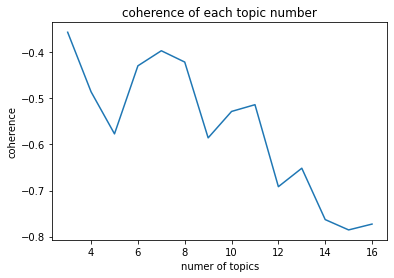

In [91]:
plt.plot(n_topics, coherence_list)
plt.ylabel('coherence')
plt.xlabel('numer of topics')
plt.title('coherence of each topic number')
plt.show

local maximum으로 7이 적당해보임

In [92]:
n_topics

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [94]:
top10_per_topic(W_res[4])#.iloc[:,list(range(0,8*2,2))]

topics_1    weight_1 topics_2    weight_2 topics_3    weight_3 topics_4  \
0       주가  272.912407       투자  333.455421       이익  251.629099       증가   
1       이익  180.049703       자산  319.366780       영업  235.869725       주가   
2       수주  158.384600       이익  242.282666       주가  173.085430       매출   
3       영업  151.792127       증권  237.227493       증가  172.821019       영업   
4       분기  116.770785       한국  215.752267       대비  162.692459       이익   
5       유지  105.712019       기타  199.747315      면세점  155.996382       유지   
6       매출  102.620674       자료  183.634685       사업  146.686394       대비   
7       상승   95.450796       현금  154.336926       전년  135.950284       분기   
8       전망   91.915704       그림  148.153296       중국  135.872233       전망   
9       대비   89.141510       영업  137.243672       실적  111.022533       성장   

     weight_4 topics_5    weight_5 topics_6    weight_6 topics_7    weight_7  
0  303.356530       분기  644.627742       현대  276.138650       이익  312.871866  
1  264.192056       이익  396.822876       영업  195.658424       영업  295.984476  
2  231.956050       대비  387.583873       주가  194.461343       분기  295.012413  
3  206.949646       주가  347.424641       이익  164.471832       주가  261.102020  
4  205.065796       실적  273.402318      중공업  143.408412       증가  227.801666  
5  168.512312       영업  261.143292       실적   92.158188       대비  186.630683  
6  165.173336      센서스  233.171628       지분   91.839768       가격  185.611057  
7  159.353550       유지  227.673037       주주   80.559115       사업  164.154830  
8  157.080489       증가  200.460789       대비   79.121717       예상  162.883627  
9  145.542200       추정  187.647729       예상   78.699619       상승  151.554922

## 추가적 stopwords

In [96]:
vocab

['이익',
 '주가',
 '분기',
 '영업',
 '증가',
 '대비',
 '실적',
 '유지',
 '상승',
 '전망',
 '매출',
 '지분',
 '예상',
 '사업',
 '투자',
 '센서스',
 '주주',
 '추정',
 '전년',
 '자료',
 '수익',
 '매수',
 '개선',
 '성장',
 '표주',
 '주요',
 '감소',
 '기준',
 '유동',
 '평균',
 '시장',
 '비율',
 '비용',
 '추이',
 '백만',
 '거래',
 '주식',
 '하락',
 '부문',
 '자산',
 '부진',
 '가격',
 '최저',
 '대금',
 '외국인',
 '식수',
 '한국',
 '발행주',
 '현대',
 '중국',
 '수준',
 '지속',
 '배당',
 '가능',
 '반영',
 '때문',
 '확대',
 '지배',
 '동기',
 '달러',
 '증권',
 '국민',
 '연금',
 '판매',
 '국내',
 '기록',
 '하반기',
 '수요',
 '의견',
 '기타',
 '올해',
 '해외',
 '지표',
 '하회',
 '상회',
 '영향',
 '수주',
 '가치',
 '기대',
 '목표',
 '회복',
 '출시',
 '기존',
 '단위',
 '효과',
 '업체',
 '관련',
 '삼성',
 '제품',
 '그림',
 '현금',
 '하향',
 '면세점',
 '증감',
 '비중',
 '생산',
 '안정',
 '상대',
 '연결',
 '이후',
 '바이오',
 '조정',
 '손익',
 '우리',
 '이상',
 '부담',
 '금융',
 '삼성전자',
 '추가',
 '서비스',
 '적용',
 '상향',
 '중공업',
 '미국',
 '규모',
 '적자',
 '부합',
 '우려',
 '신규',
 '판단',
 '요인',
 '구조',
 '기업',
 '부채',
 '글로벌',
 '계획',
 '장기',
 '향후',
 '자본',
 '의미',
 '감안',
 '가입자',
 '패널',
 '긍정',
 '전환',
 '흐름',
 '가동',
 '연간',
 '최근',
 '손실',
 '공장',
 

In [97]:
len(vocab)

7111

In [98]:
print(vocab)

['이익', '주가', '분기', '영업', '증가', '대비', '실적', '유지', '상승', '전망', '매출', '지분', '예상', '사업', '투자', '센서스', '주주', '추정', '전년', '자료', '수익', '매수', '개선', '성장', '표주', '주요', '감소', '기준', '유동', '평균', '시장', '비율', '비용', '추이', '백만', '거래', '주식', '하락', '부문', '자산', '부진', '가격', '최저', '대금', '외국인', '식수', '한국', '발행주', '현대', '중국', '수준', '지속', '배당', '가능', '반영', '때문', '확대', '지배', '동기', '달러', '증권', '국민', '연금', '판매', '국내', '기록', '하반기', '수요', '의견', '기타', '올해', '해외', '지표', '하회', '상회', '영향', '수주', '가치', '기대', '목표', '회복', '출시', '기존', '단위', '효과', '업체', '관련', '삼성', '제품', '그림', '현금', '하향', '면세점', '증감', '비중', '생산', '안정', '상대', '연결', '이후', '바이오', '조정', '손익', '우리', '이상', '부담', '금융', '삼성전자', '추가', '서비스', '적용', '상향', '중공업', '미국', '규모', '적자', '부합', '우려', '신규', '판단', '요인', '구조', '기업', '부채', '글로벌', '계획', '장기', '향후', '자본', '의미', '감안', '가입자', '패널', '긍정', '전환', '흐름', '가동', '연간', '최근', '손실', '공장', '시작', '호조', '화장품', '발생', '마진', '경쟁', '설비', '제외', '공급', '디램', '리니지', '축소', '재고', '단기', '상황', '통신', '세전', '평가', '자동차', '점유', '모바일', '상반기', '경우'

In [99]:
stopwords2 = ['이익', '주가', '분기', '영업', '증가', '대비', '실적', '유지', '상승', '전망', '매출', 
              '지분', '예상', '사업', '투자', '센서스', '주주', '추정', '전년', '자료', '수익', '매수',
              '개선', '성장', '표주', '주요', '감소', '기준', '유동', '평균', '시장', '비율', '비용', '추이', 
              '백만', '거래', '주식', '하락', '부문', '자산', '부진', '가격', '최저', '대금', '외국인', '식수',
              '한국', '발행주', '현대', '중국', '수준', '지속', '배당', '가능', '반영', '때문', '확대', '지배', 
              '동기', '달러', '증권', '국민', '연금', '판매', '국내', '기록', '하반기', '수요', '의견', '기타', 
              '올해', '해외', '지표', '하회', '상회', '영향', '수주', '가치', '기대', '목표', '회복', '출시', '기존',
              '단위', '효과', '업체', '관련', '제품', '그림', '현금', '하향', '면세점', '증감', '비중', '생산',
              '안정', '상대', '연결', '이후', '조정', '손익', '우리', '이상', '부담',  '추가',
              '서비스', '적용', '상향', '규모', '부합', '판단', '요인', '구조', 
              '기업', '계획', '장기', '향후', '자본', '의미', '감안', '패널', '긍정',  
              '흐름', '연간', '최근', '시작', '발생', '경쟁', '제외', 
              '축소',  '단기', '상황',  '세전', '평가', '점유',
              '경우', '변경', '예정', '회사', '고려','지주','보유', 
              '매각', '원가', '차입금', '진행', '강화', '차이', '작년', '인상', 
              '당사', '필요', '중립', '산업', '가정', '한편',
              '시점', '내년', '정책', '계약', '확보', '둔화', '총계', '환경', '유형', 
              '발표', '순증', '본격', '고객', '성향', '포함', '전체', 
              '낸드', '에서', '반면',  
              '하나', '재무', '전략', '이자', '기여', 
              '결정', '해소', '활동', '달성', '정상', '매력', '충당', 
              '판매량', '할인', '결론', '소재', '시기', '유사', '주목', '기저', '일부', '으로', 
              '당초', '당기', '완화', '이번', '이동',
              '순차', '이유', '포괄', '만큼', '소폭',
              '기반', '도입', '부각', '관리', '핵심', '추세', 
              '대손', '가운데', '제시', '개편', '효율', '입금', '주당', '지급', 
              '시황', '현재', '스프']

In [100]:
len(stopwords)

43

In [101]:
stopwords.extend(stopwords2)

In [102]:
len(stopwords)

267

# 종목 뽑아내기

In [253]:
data.filename

0                 한투20170224SKT
1                  한투20170124SK
2            한투20190425KB금융
3         한투20170710엔씨소프트
4             한투20190201LG전자
                  ...             
977                한투20170323KT
978      한투20170828한국전력
979      한투20180703CJ제일제당
980    한투20190128현대글로비스
981     한투20190510롯데하이마트
Name: filename, Length: 982, dtype: object

In [254]:
stock = [str(x[13:]) for x in data.filename]

In [255]:
# 놀랍게도 mac os 의 문제인지 '삼성' in 삼성중공업' false 가 났는데... 자모음이 분리 된채였기 때문
import unicodedata
stock = list(map(lambda x: unicodedata.normalize('NFC',x), stock))

In [256]:
stock = list(set(stock))

In [257]:
stock

['삼성전자',
 'CJ제일제당2',
 '현대제철',
 '삼성중공업',
 'LG유플러스2',
 '카카오',
 'KTG',
 '현대건설기계',
 'LG전자',
 'SKT2',
 'LG화학',
 '대한항공',
 '삼성바이오로직스',
 'SKC코오롱PI',
 'LGU',
 '롯데케미칼',
 '삼성카드',
 'S-Oil',
 'GS홈쇼핑',
 'KT2',
 '삼성전기',
 '호텔신라',
 '우리금융지주',
 '롯데하이마트',
 'LG디스플레이',
 '이마트',
 'CJ제일제당',
 '신한지주',
 '한미약품',
 'SK디앤디',
 '셀트리온',
 'LG생건',
 '기업은행',
 '삼성SDI',
 '현대차',
 '현대건설',
 'LG하우시스',
 '현대글로비스',
 'DB손해보험',
 '기아차',
 '삼성엔지니어링',
 '아모레퍼시픽',
 '두산중공업',
 '한국항공우주',
 '현대중공업지주',
 '현대모비스',
 '롯데지주NR',
 'SK텔레콤2',
 '넷마블게임즈',
 '넷마블',
 '한국타이어앤테크놀로지',
 'GS리테일',
 '팬오션',
 '아모레퍼시픽2',
 '아모레G',
 'SK이노베이션',
 'KTH',
 'SKT',
 '한국전력',
 '두산밥캣',
 '삼성물산',
 'GS',
 'LG생활건강',
 '메리츠화재',
 '삼성증권',
 '셀트리온헬스케어',
 '한국가스공사',
 '한온시스템',
 '강원랜드',
 'KT',
 '오리온',
 '롯데지주',
 '고려아연',
 'SK',
 '금호석유',
 '엔씨소프트',
 'LGD',
 'NAVER',
 'GS건설',
 'SK하이닉스',
 '1삼성카드',
 'LG이노텍',
 'KB금융',
 'SK머티리얼즈',
 '삼성화재',
 'NH투자증권',
 '하나금융지주',
 'LG유플러스',
 '현대중공업',
 '삼성생명',
 'SK텔레콤',
 '코웨이',
 '유한양행']

# 삼성전자

In [260]:
for x in stock:
    if '삼성' in x :
        print(x)

삼성전자
삼성중공업
삼성바이오로직스
삼성카드
삼성전기
삼성SDI
삼성엔지니어링
삼성물산
삼성증권
1삼성카드
삼성화재
삼성생명


In [272]:
SamsungElec = data[['삼성전자' in unicodedata.normalize('NFC',x) for x in data.filename]]
SamsungElec

filename  \
11   한투20180201삼성전자   
36   한투20180409삼성전자   
63   한투20180928삼성전자   
78   한투20180607삼성전자   
92   한투20170925삼성전자   
110  한투20170322삼성전자   
128  한투20181101삼성전자   
154  한투20170410삼성전자   
199  한투20180427삼성전자   
213  한투20190201삼성전자   
219  한투20190315삼성전자   
230  한투20171101삼성전자   
256  한투20190801삼성전자   
341  한투20190708삼성전자   
378  한투20181214삼성전자   
445  한투20170428삼성전자   
451  한투20180801삼성전자   
496  한투20170125삼성전자   
545  한투20180411삼성전자   
549  한투20171220삼성전자   
557  한투20190408삼성전자   
568  한투20180612삼성전자   
697  한투20170703삼성전자   
731  한투20170728삼성전자   
775  한투20180709삼성전자   
780  한투20170324삼성전자   
819  한투20171016삼성전자   
843  한투20190502삼성전자   
847  한투20190109삼성전자   
904  한투20190627삼성전자   
937  한투20180330삼성전자   

                                               content  
11    삼성전자 하 회 부 합 상 회 주 영업이익의 컨센서스 대비를 의미 년만의 실적 추...  
36    삼성전자 Q 잠정실적 IM부문 서프라이즈 Q 영업이익 으로 예상 상회 분기 매출액...  
63    삼성전자 Q Preview 실적은 좋지만 모멘텀은 약세 전환 매수 유지 목표주가 ...  
78    삼성전자 Investors Forum 파운드리 사업 역전의 로드맵 마련 파운드리 ...  
92    삼성전자 매수 유지 Q Preview 삼성전자를 선호하는 이유 목표주가 원 상향 ...  
110   삼성전자 매수 유지 Q Preview 시작부터 세다 목표주가 원 상향 Stock ...  
128   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 설비투자 감소로 주...  
154   삼성전자 매수 유지 성장주로의 귀환 목표주가 원 유지 Stock Data KOSP...  
199   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 기대만큼 안 팔리는...  
213   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 밸류에이션 상승으로...  
219   삼성전자 Q Preview 분기가 실적 저점 매수 유지 목표주가 원 유지 분기 매...  
230   Above 삼성전자 In line Below 매수 유지 디램 설비투자 생각보다 많...  
256   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 수요가 좋아진다고 ...  
341   삼성전자 경쟁력 강화로 하반기 실적 개선 기대 매수 유지 목표주가 원 유지 회성 ...  
378   삼성전자 Q Preview 불안한 메모리 매수 유지 목표주가 원 하향 분기 매출액...  
445   Above 삼성전자 In line Below 매수 유지 실적과 주주환원의 하모니 ...  
451   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 분기 이후 실적모멘...  
496   Above 삼성전자 In line Below 매수 유지 메모리 가격 상승폭 확대 ...  
545   txt 삼성전자 매수 유지 TP 원 유지 주가 원 시가총액 발행주식수 백만 주 최...  
549   삼성전자 매수 유지 Q Preview 성과급과 환율 영향으로 예상 하회할 듯 목표...  
557   삼성전자 하반기 부품가격 하락으로 인한 수요회복 기대 매수 유지 목표주가 원 유지...  
568   삼성전자 Q Preview 영업이익 하회할 전망 매수 유지 목표주가 원 유지 분기...  
697   삼성전자 매수 유지 Q Preview 영업이익 으로 예상 상회 목표주가 원 유지 ...  
731   Above 삼성전자 In line Below 매수 유지 완제품 수요부진 vs 메모...  
775   삼성전자 분기는 지나갔고 분기를 기대하자 매수 유지 목표주가 원 유지 분기 반도체...  
780   삼성전자 매수 유지 갤럭시S 판가 상승 vs 디자인 차별화 목표주가 원 유지 St...  
819   삼성전자 매수 유지 Q 잠정실적 예상치 부합 목표주가 원 유지 Stock Data...  
843   삼성전자 하 회 부 합 영업이익의 컨센서스 대비를 의미 상 회 분기부터 이익 회복...  
847   삼성전자 서버디램 수요가 사라졌다 매수 유지 목표주가 원 하향 지난 분기 반도체부...  
904   삼성전자 Q Preview 가격하락에도 선방한 메모리사업 매수 유지 목표주가 원 ...  
937   txt 재무상태표 단위 유동자산 현금성자산 매출채권및기타채권 재고자산 비유동자산 ...

In [301]:
clean_nouns = []
for doc in tqdm(SamsungElec.content) :
    clean_nouns.append(remove_stopwords(doc))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 371.67it/s]


In [302]:
noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

/var/folders/xb/2s8ljjjd6zg0df496bld_5bw0000gn/T/ipykernel_8848/4092860173.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))


In [303]:
noun_list_mecab

['삼성전자',
 '전사',
 '스마트폰',
 '당액',
 '액면',
 '분할',
 '밸류',
 '상승기',
 '대감',
 '유효',
 '기말',
 '보통주',
 '우선주',
 '총액',
 '적극',
 '환원',
 '확인',
 '액면',
 '분할',
 '멘탈',
 '변화',
 '개인',
 '투자자',
 '증대',
 '총액',
 '변동',
 '이지만',
 '환원',
 '실질',
 '환원',
 '환원',
 '액면',
 '분할',
 '밸류',
 '모바일',
 '플렉서블',
 '스마트폰',
 '상반기',
 '신모',
 '디스플레이',
 '부품',
 '스마트폰',
 '직접',
 '원인',
 '삼성전자',
 '스마트폰',
 '압박',
 '반도체',
 '수급',
 '약화',
 '원인',
 '스마',
 '삼성전자',
 '약화',
 '밸류',
 '스마트폰',
 '정도',
 '확인',
 '액면',
 '분할',
 '개인',
 '기회',
 '밸류',
 '삼성물산',
 '유종우',
 '김정환',
 '삼성전자',
 '삼성전자',
 '잠정',
 '서프라이즈',
 '반도체',
 '반도체',
 '인건비',
 '절감',
 '회성',
 '환입',
 '원인',
 '원화',
 '강세',
 '중소형',
 '출하량',
 '삼성전자',
 '잠정',
 '갤럭시',
 '마케팅',
 '환입',
 '한시',
 '반도체',
 '반도체',
 '절감',
 '디램',
 '변화',
 '디램',
 '모바일',
 '원인',
 '디램',
 '출하량',
 '반도체',
 '삼성물산',
 '여전',
 '반도체',
 '유종우',
 '김정환',
 '삼성전자',
 '삼성전자',
 '약세',
 '전환',
 '사상',
 '최대',
 '최대',
 '사상',
 '최대',
 '역시',
 '반도체',
 '반도체',
 '반도체',
 '아이',
 '공급',
 '정점',
 '상반',
 '메모리',
 '약세',
 '메모리',
 '디램',
 '약세',
 '디램',
 '자리',
 '초반',
 '메모리',
 '공급',
 '모바일',
 '메모리',
 '약세'

In [304]:
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

In [305]:
word_to_index

{'삼성전자': 1,
 '반도체': 2,
 '출하량': 3,
 '디램': 4,
 '스마트폰': 5,
 '메모리': 6,
 '핸드셋': 7,
 '갤럭시': 8,
 '부채': 9,
 '재고': 10,
 '모바일': 11,
 '모델': 12,
 '설비': 13,
 '변화': 14,
 '공급': 15,
 '삼성물산': 16,
 '유종우': 17,
 '환원': 18,
 '디스플레이': 19,
 '전환': 20,
 '피쳐': 21,
 '태블릿': 22,
 '시스템': 23,
 '밸류': 24,
 '서버': 25,
 '모니터': 26,
 '무형': 27,
 '금융': 28,
 '수급': 29,
 '공정': 30,
 '아이폰': 31,
 '상반기': 32,
 '원인': 33,
 '물량': 34,
 '강세': 35,
 '지배주': 36,
 '가이던스': 37,
 '김정환': 38,
 '구성': 39,
 '라인': 40,
 '악화': 41,
 '사채': 42,
 '잉여금': 43,
 '개요': 44,
 '용어': 45,
 '해설': 46,
 '공업': 47,
 '주식회사': 48,
 '설립': 49,
 '디지털': 50,
 '냉장고': 51,
 '피처': 52,
 '휴대폰': 53,
 '컴퓨터': 54,
 '노트북': 55,
 '잠정': 56,
 '절감': 57,
 '통신': 58,
 '양산': 59,
 '애플': 60,
 '출하': 61,
 '조절': 62,
 '증가세': 63,
 '용량': 64,
 '분할': 65,
 '약세': 66,
 '중저가': 67,
 '프린터': 68,
 '기술': 69,
 '액면': 70,
 '부품': 71,
 '정도': 72,
 '경쟁력': 73,
 '능력': 74,
 '생산량': 75,
 '당액': 76,
 '비수기': 77,
 '주순': 78,
 '센터': 79,
 '업종': 80,
 '중반': 81,
 '소각': 82,
 '인치': 83,
 '전사': 84,
 '변동': 85,
 '노트': 86,
 '플래그': 87,
 '데이터': 88,


In [306]:
vocab = list(word_to_index.keys())

In [307]:
vocab_freq_per_doc = []
for doc in tqdm(clean_nouns):
    tmp = {}
    vocab_freq= Counter(doc).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
    for idx in range(len(vocab_freq)):
        key = word_to_index[vocab_freq[idx][0]]
        val = vocab_freq[idx][1]
        
        tmp[key]=val
    vocab_freq_per_doc.append(tmp)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 7965.17it/s]


In [308]:
random_seed(42)

In [309]:
dictionary = corpora.Dictionary(clean_nouns)
corpus = [dictionary.doc2bow(text) for text in clean_nouns]

In [310]:
X = construct_X(vocab, vocab_freq_per_doc)
n_topics = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
coherence_list = []
H_res = []
W_res = []
errors_res = []
for rank in n_topics:
    # Randomly initialize W, H with nonnegative values : uniform (1,2)
    W = np.random.uniform(1,2,(X.shape[0], rank))
    H = np.random.uniform(1,2,(rank,X.shape[1]))
    H, W, errors = NMF(iters, rank, X, W, H)
    H_res.append(H)
    W_res.append(W)
    errors_res.append(errors)
    topics = top10_per_topic(W).iloc[:,list(range(0,rank*2,2))].T.values.tolist()
    coherence_list.append(coherence(topics, corpus, dictionary))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 872.08it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

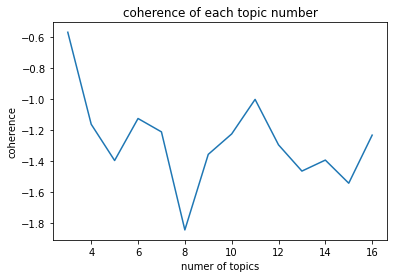

In [311]:
plt.plot(n_topics, coherence_list)
plt.ylabel('coherence')
plt.xlabel('numer of topics')
plt.title('coherence of each topic number')
plt.show

local maximum 은 11개로 보임

In [312]:
n_topics

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [313]:
n_topics[8]

11

In [314]:
top10_per_topic(W_res[8]).iloc[:,list(range(0,11*2,2))]

topics_1 topics_2 topics_3 topics_4 topics_5 topics_6 topics_7 topics_8  \
0      반도체     삼성전자       디램       모델       디램       디램     삼성전자     삼성전자   
1       전환      출하량     삼성전자      출하량     삼성전자     삼성전자      반도체      출하량   
2       디램      반도체       재고     삼성전자       설비      반도체      출하량      반도체   
3       소각     스마트폰      메모리      갤럭시      메모리     스마트폰     스마트폰     스마트폰   
4      출하량       디램       설비     스마트폰      반도체       수급       부채       부채   
5     삼성전자      핸드셋       조절      반도체     스마트폰       환원      핸드셋      핸드셋   
6       잠정      메모리       공급      아이폰      출하량      모바일       기술       변화   
7      지주사      모니터       라인       물량       밸류       밸류       변화      메모리   
8       절감      태블릿     가이던스       부채       증설       강세      메모리       금융   
9       환원      시스템      반도체       분할       서버       서버       금융       무형   

  topics_9 topics_10 topics_11  
0     삼성전자       갤럭시      삼성전자  
1      메모리       디자인       출하량  
2      갤럭시        인치       반도체  
3      반도체     디스플레이      스마트폰  
4       디램        모델       핸드셋  
5     스마트폰        변화       메모리  
6       재고      삼성전자        디램  
7       공급        차별       모바일  
8      출하량        채택       경쟁력  
9      비수기        판가        용량

너무 비슷비슷해서 6으로 줄여보자

In [315]:
n_topics[3]

6

In [316]:
top10_per_topic(W_res[3]).iloc[:,list(range(0,6*2,2))]

topics_1 topics_2 topics_3 topics_4 topics_5 topics_6
0      갤럭시     삼성전자     삼성전자     삼성전자       디램       디램
1       디램      출하량       모델      출하량     삼성전자     삼성전자
2     삼성전자      반도체      출하량      반도체       전환      반도체
3       재고     스마트폰      갤럭시     스마트폰       설비      출하량
4      반도체      핸드셋      반도체       부채       환원     스마트폰
5      메모리       디램     스마트폰      핸드셋      메모리      메모리
6       모델      메모리      아이폰       변화      반도체       강세
7       원인      시스템       부채      메모리     스마트폰      모바일
8       인치       피쳐       물량       무형       소각       서버
9      디자인      태블릿       분할       금융      출하량      갤럭시

역시 종목별 키워드 주제는...더 좁아야할듯 3으로 줄이기

In [317]:
n_topics[0]

3

In [318]:
top10_per_topic(W_res[0]).iloc[:,list(range(0,3*2,2))]

topics_1 topics_2 topics_3
0     삼성전자     삼성전자       디램
1      반도체      출하량     삼성전자
2      출하량      반도체       설비
3       디램     스마트폰       모델
4     스마트폰       부채       환원
5      메모리      갤럭시     스마트폰
6      핸드셋       변화      반도체
7       재고      핸드셋       전환
8      모바일      메모리      메모리
9      태블릿       금융      유종우

토픽 1,2,3 가 무슨차이..이지?

In [319]:
X.shape

(550, 31)

In [320]:
SamsungElec.shape

(31, 2)

# [삼성전자, 삼성바이오로직스, NAVER, 삼성SDI, 현대차, KB금융]

### 겹치지 않는 섹터 6개 종목-> 토픽수 6개가 배타적으로 구성되는지 확인

In [322]:
for x in stock:
    if '삼성' in x :
        print(x)

삼성전자
삼성중공업
삼성바이오로직스
삼성카드
삼성전기
삼성SDI
삼성엔지니어링
삼성물산
삼성증권
1삼성카드
삼성화재
삼성생명


In [330]:
for x in stock:
    if 'NAVER' in x or'Naver' in x or'네이버' in x:
        print(x)

NAVER


In [334]:
for x in stock:
    if '현대' in x:
        print(x)

현대제철
현대건설기계
현대차
현대건설
현대글로비스
현대중공업지주
현대모비스
현대중공업


In [336]:
for x in stock:
    if 'KB' in x or 'Kb' in x or'kb' in x:
        print(x)

KB금융


In [324]:
sector = pd.DataFrame()

In [325]:
sector = pd.concat([sector,data[['삼성전자' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [327]:
sector = pd.concat([sector,data[['삼성바이오로직스' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [337]:
sector = pd.concat([sector,data[['삼성SDI' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [339]:
sector = pd.concat([sector,data[['NAVER' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [340]:
sector = pd.concat([sector,data[['현대차' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [341]:
sector = pd.concat([sector,data[['KB금융' in unicodedata.normalize('NFC',x) for x in data.filename]]])

In [342]:
sector

filename  \
11   한투20180201삼성전자   
36   한투20180409삼성전자   
63   한투20180928삼성전자   
78   한투20180607삼성전자   
92   한투20170925삼성전자   
..                        ...   
541     한투20180720KB금융   
543     한투20190719KB금융   
804     한투20180209KB금융   
887     한투20170721KB금융   
908     한투20181026KB금융   

                                               content  
11    삼성전자 하 회 부 합 상 회 주 영업이익의 컨센서스 대비를 의미 년만의 실적 추...  
36    삼성전자 Q 잠정실적 IM부문 서프라이즈 Q 영업이익 으로 예상 상회 분기 매출액...  
63    삼성전자 Q Preview 실적은 좋지만 모멘텀은 약세 전환 매수 유지 목표주가 ...  
78    삼성전자 Investors Forum 파운드리 사업 역전의 로드맵 마련 파운드리 ...  
92    삼성전자 매수 유지 Q Preview 삼성전자를 선호하는 이유 목표주가 원 상향 ...  
..                                                 ...  
541   KB금융 하 회 부 합 순이익의 컨센서스 대비를 의미 상 회 다소 무난했던 실적 ...  
543   KB 금융 하 회 부 합 순이익의 컨센서스 대비를 의미 상 회 금리가 빠져도 실적...  
804   KB금융 하 회 부 합 순이익의 컨센서스 대비를 의미 상 회 수익창출 확대와 주주...  
887   Above KB금융 In line Below 매수 유지 사업 다각화 효과는 이제 ...  
908   KB금융 하 회 부 합 순이익의 컨센서스 대비를 의미 상 회 어려웠던 분기를 잘 ...  

[106 rows x 2 columns]

In [343]:
clean_nouns = []
for doc in tqdm(sector.content) :
    clean_nouns.append(remove_stopwords(doc))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:00<00:00, 262.23it/s]


In [344]:
noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

/var/folders/xb/2s8ljjjd6zg0df496bld_5bw0000gn/T/ipykernel_8848/4092860173.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))


In [345]:
noun_list_mecab

['삼성전자',
 '전사',
 '스마트폰',
 '당액',
 '액면',
 '분할',
 '밸류',
 '상승기',
 '대감',
 '유효',
 '기말',
 '보통주',
 '우선주',
 '총액',
 '적극',
 '환원',
 '확인',
 '액면',
 '분할',
 '멘탈',
 '변화',
 '개인',
 '투자자',
 '증대',
 '총액',
 '변동',
 '이지만',
 '환원',
 '실질',
 '환원',
 '환원',
 '액면',
 '분할',
 '밸류',
 '모바일',
 '플렉서블',
 '스마트폰',
 '상반기',
 '신모',
 '디스플레이',
 '부품',
 '스마트폰',
 '직접',
 '원인',
 '삼성전자',
 '스마트폰',
 '압박',
 '반도체',
 '수급',
 '약화',
 '원인',
 '스마',
 '삼성전자',
 '약화',
 '밸류',
 '스마트폰',
 '정도',
 '확인',
 '액면',
 '분할',
 '개인',
 '기회',
 '밸류',
 '삼성물산',
 '유종우',
 '김정환',
 '삼성전자',
 '삼성전자',
 '잠정',
 '서프라이즈',
 '반도체',
 '반도체',
 '인건비',
 '절감',
 '회성',
 '환입',
 '원인',
 '원화',
 '강세',
 '중소형',
 '출하량',
 '삼성전자',
 '잠정',
 '갤럭시',
 '마케팅',
 '환입',
 '한시',
 '반도체',
 '반도체',
 '절감',
 '디램',
 '변화',
 '디램',
 '모바일',
 '원인',
 '디램',
 '출하량',
 '반도체',
 '삼성물산',
 '여전',
 '반도체',
 '유종우',
 '김정환',
 '삼성전자',
 '삼성전자',
 '약세',
 '전환',
 '사상',
 '최대',
 '최대',
 '사상',
 '최대',
 '역시',
 '반도체',
 '반도체',
 '반도체',
 '아이',
 '공급',
 '정점',
 '상반',
 '메모리',
 '약세',
 '메모리',
 '디램',
 '약세',
 '디램',
 '자리',
 '초반',
 '메모리',
 '공급',
 '모바일',
 '메모리',
 '약세'

In [346]:
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

In [347]:
vocab = list(word_to_index.keys())

In [348]:
vocab_freq_per_doc = []
for doc in tqdm(clean_nouns):
    tmp = {}
    vocab_freq= Counter(doc).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
    for idx in range(len(vocab_freq)):
        key = word_to_index[vocab_freq[idx][0]]
        val = vocab_freq[idx][1]
        
        tmp[key]=val
    vocab_freq_per_doc.append(tmp)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:00<00:00, 8672.17it/s]


In [349]:
random_seed(42)

In [350]:
dictionary = corpora.Dictionary(clean_nouns)
corpus = [dictionary.doc2bow(text) for text in clean_nouns]

In [351]:
X = construct_X(vocab, vocab_freq_per_doc)
n_topics = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
coherence_list = []
H_res = []
W_res = []
errors_res = []
for rank in n_topics:
    # Randomly initialize W, H with nonnegative values : uniform (1,2)
    W = np.random.uniform(1,2,(X.shape[0], rank))
    H = np.random.uniform(1,2,(rank,X.shape[1]))
    H, W, errors = NMF(iters, rank, X, W, H)
    H_res.append(H)
    W_res.append(W)
    errors_res.append(errors)
    topics = top10_per_topic(W).iloc[:,list(range(0,rank*2,2))].T.values.tolist()
    coherence_list.append(coherence(topics, corpus, dictionary))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 108.72it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

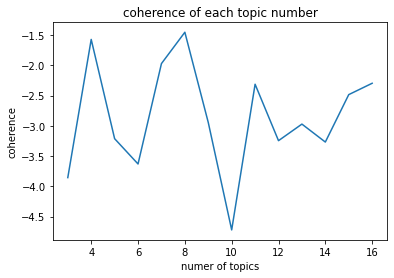

In [352]:
plt.plot(n_topics, coherence_list)
plt.ylabel('coherence')
plt.xlabel('numer of topics')
plt.title('coherence of each topic number')
plt.show

In [354]:
n_topics[3]

6

In [355]:
top10_per_topic(W_res[3]).iloc[:,list(range(0,6*2,2))]

topics_1 topics_2 topics_3 topics_4 topics_5 topics_6
0      바이오       광고      현대차      네이버       미국     삼성전자
1       삼성       쇼핑       금융       라인       금융      반도체
2       공장       플랫       은행       결제       경과      출하량
3      로직스       검색       대출       변화      현대차       디램
4       유럽       페이       파업       페이      중고차     스마트폰
5       피스       신규       신차       광고       리스      메모리
6       밀러       부채       그룹       검색       부채      핸드셋
7       가동      이용자       경상       쇼핑      자동차      갤럭시
8       전지      콘텐츠       환율       임금      기아차       부채
9       미국      마케팅       미국       일본       허가       재고

In [356]:
X.shape

(2063, 106)